
# Project: Investigate a dataset - No-show for medical appointments in Brazil
### **by Jarvis Rwabuyongo**

   
   ***

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions and answers</a></li>
</ul>



<a id='intro'></a>

## Introduction 

For my first project I will be analyzing and drawing some conclusions based on a dataset showing no-show and show data for medical appointments from Brazil, combined with some other data from which the original source is [here](https://www.google.com/url?q=https://www.kaggle.com/joniarroba/noshowappointments&sa=D&ust=1532469042118000)

#### Description of the values in the dataset
- Age =>Tells us how old the patients are.
- Alcoholism => Is the patient an alcoholic?.
- AppointmentDay => The day the patient has to meet the doctor.
- AppointmentID => Identification of the appointment.
- Diabetes => Is the patient diabetic or not.
- Gender => Gender of the patient.
- Handcap => Shows us if the patient is handicapped.
- Hipertension => Shows us if the patient suffers from hypertension.
- Neighborhood => Where the hospital is located.
- No-show => Shows us wether the patient showed up or did not show up for the appointment.
- PatientId => Identification of the patient.
- ScheduledDay => this tells us on what day the patient had set up their appointment.
- Scholarship => Shows us if the patient is enrolled in Brasilian welfare program Bolsa Família.
- SMS_received => 1 or more messages received by the patient.

#### Questions asked:
**Based on the data present, I was able to come up with the questions below as to why the patients may not show up for their scheduled medical appointments in Brazil**
- Can the age of the patients be a factor for them to show up or not show up for the medical appointments?
- Does the patient's health condition affect if they will show up for their medical appointments?
- Does sending an SMS regarding the medical appointment to the patients help them show up for their appointments?

#### Loading of libraries and packages to be used in the project:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data wrangling 
In this section I will be performing data wrangling procedures which are gathering the data(Loading the csv data to my notebook), assessing the data and cleaning it before using it to explore my problem set 

### General properties
In this part we load the data into our notebook, and we display its first 5 entries so that we can get a clear picture of the dataset. We will also need to perform more procedures to see the structure of the data.

In [2]:
df_appointment = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df_appointment.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Generally I can see that there may be spelling mistakes in some column values such as Hipertension instead of Hypertension and Handcap instead of Handicap

### These functions will help me build some intuition in the data values

In [3]:
#Checking general structure of the data
df_appointment.shape

(110527, 14)

This output tells me that there are 110527 rows with 14 columns

In [4]:
#This shows concise summary of the data frame
df_appointment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From here I can see that there is no any null value in the data set thus I should check also for presence of duplicate values

In [5]:
#this function will display number of unique values in the dataset
df_appointment.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Here we can see that :
- There are 62299 unique values of the PatientId, this means that there is a total of 62299 patients. 
- There are 110527 different appointments since they have a unique ID
- Gender, Scholarship, Hipertension, Diabetes, Alcoholism, SMS_received and No-show have binary unique values
- There are 104 unique ages thus we should check these values to see if there can be values that may be seem impossible,such as very large ages or negative values


In [6]:
#displaying unique values from the Age column
df_appointment['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

Here we can see that there is a negative age, '-1' which is not possible and also ages like 115 are not very common, thus may have to be looked at in the data cleaning process

#### The health conditions as per from the dataset are Diabetes, Hipertension, Handcap and Alcoholism

In [7]:
#displaying the unique values in selected health conditions
print(df_appointment['Diabetes'].unique())
print(df_appointment['Hipertension'].unique())
print(df_appointment['Handcap'].unique())
print(df_appointment['Alcoholism'].unique())

[0 1]
[1 0]
[0 1 2 3 4]
[0 1]


The 5 different values in Handcap means that there are 5 different handcap states, however from the data source, we are told that handcap is either True/False and nothing here can guide us on which measure to be taken. The rest are also true and false thus, **Assumption made here is that for the ones that have binary values, 0 will mean false and 1 will mean true and also for handcap, 0 will signify that there is no any handcap on that patient and the remaining values(1,2,3 and 4) will signify that the patient has some kind of handcap** 

In [8]:
df_appointment['SMS_received'].unique()

array([0, 1], dtype=int64)

This implies to me that 0 will mean that a message was not received and 1 will mean that a message was received prior to the appointment date

In [9]:
df_appointment['No-show'].unique()

array(['No', 'Yes'], dtype=object)

This implies to me that No value will mean that the patient made the appointment and Yes will mean that the patient missed the appointment

In [10]:
#Checking if there is presence of duplicates in our data
df_appointment.duplicated().sum()

0

This implies that there is no any duplicated data in our dataframe

### Data Cleaning

Here we will perform some data cleaning procedures based on some features from the previous stage to get some good quality data that can be used for exploratory data analysis

**First, renaming the columns Handcap and Hipertension to Handicap and Hypertension respectively:**

In [11]:
df_appointment.rename(columns = {'Hipertension' : 'Hypertension', 'Handcap' : 'Handicap'}, inplace = True)

In [12]:
#Viewing renamed columns
df_appointment.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


**Secondly removing some age values from the dataset:**

In [13]:
#Here we also assume that 0 is the age of a child below 1 year
df_appointment = df_appointment[(df_appointment['Age'] >= 0) & (df_appointment['Age'] < 115)]

In [14]:
#Checking to see the age values again
df_appointment['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 100,  99], dtype=int64)

**Thirdly we can modify the No-show column to easily understandable for better use in data wrangling process** 

In [15]:
df_appointment['No-show'] = df_appointment['No-show'].replace(('Yes', 'No'), ("Didn't show up", "Showed Up"))

**Finally, it would also be better if we also had only two values for Handicap thus making a dataframe with only two values:**

In [16]:
df_appointment['Handicap'] =df_appointment['Handicap'].mask(df_appointment['Handicap']>1,1)

In [17]:
df_appointment['Handicap'].unique()

array([0, 1], dtype=int64)

In [18]:
#Displaying the final cleaned 10 rows of data
df_appointment.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Showed Up
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,Showed Up
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,Showed Up
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Showed Up
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,Showed Up
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,Showed Up
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Didn't show up
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Didn't show up
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,Showed Up
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,Showed Up


Here, all of the necessary steps to prepare useful data have been done, so we will move to exploratory data analysis and see what we can find

***
<a id='eda'></a>
## Exploratory Data Analysis 

Here we will try to find some relationships and patterns that will help us to draw some conclusions to our questions. 
***
### Research Question 1: Can the age of the patients be a factor for them to show up or not show up for the medical appointments?

Here we will create a new column called Age_group that we will use to check the relationship with No-show(Yes) data

In [19]:
df_appointment.loc[df_appointment['Age'].between(0, 14, 'both'), 'Age_group'] = 'Children'
df_appointment.loc[df_appointment['Age'].between(15, 24, 'both'), 'Age_group'] = 'Youth'
df_appointment.loc[df_appointment['Age'].between(25, 64, 'both'), 'Age_group'] = 'Adults'
df_appointment.loc[df_appointment['Age'].between(65, 115, 'left'), 'Age_group'] = 'Seniors'

In [20]:
#Checking to see the Age_group
df_appointment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110521 non-null  float64
 1   AppointmentID   110521 non-null  int64  
 2   Gender          110521 non-null  object 
 3   ScheduledDay    110521 non-null  object 
 4   AppointmentDay  110521 non-null  object 
 5   Age             110521 non-null  int64  
 6   Neighbourhood   110521 non-null  object 
 7   Scholarship     110521 non-null  int64  
 8   Hypertension    110521 non-null  int64  
 9   Diabetes        110521 non-null  int64  
 10  Alcoholism      110521 non-null  int64  
 11  Handicap        110521 non-null  int64  
 12  SMS_received    110521 non-null  int64  
 13  No-show         110521 non-null  object 
 14  Age_group       110521 non-null  object 
dtypes: float64(1), int64(8), object(6)
memory usage: 13.5+ MB


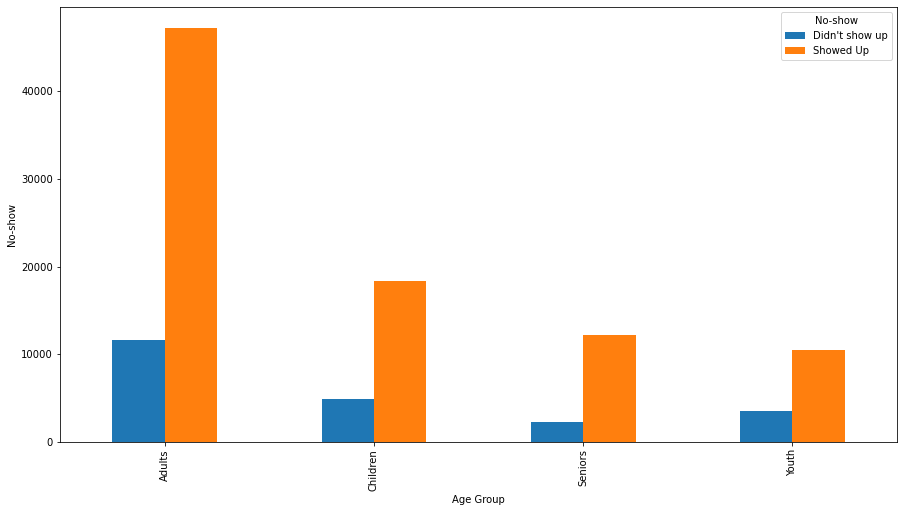

In [21]:
#Plotting a bar graph to get some analysis
df = df_appointment.groupby(['Age_group','No-show']).size()
df=df.unstack()
df.plot(kind='bar', figsize = (15,8))
plt.xlabel('Age Group')
plt.ylabel('No-show')
plt.show()

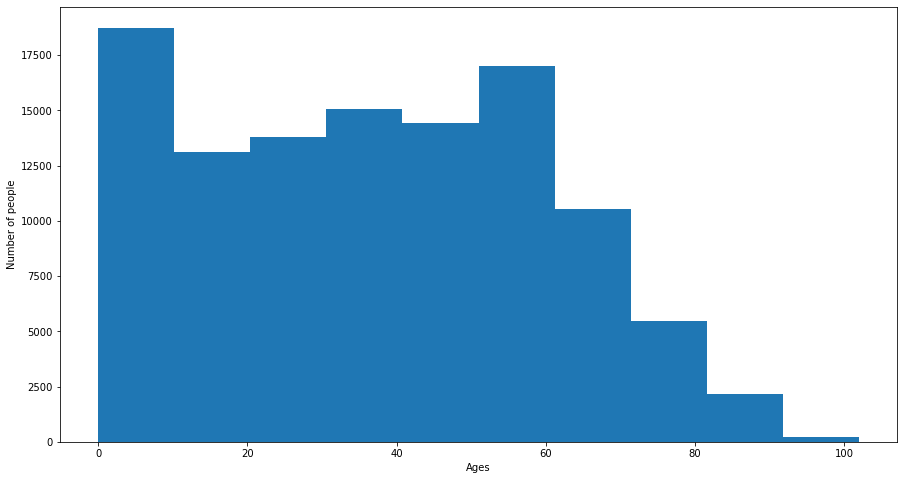

In [55]:
#This plot will help us see distribution of patients across ages
df_appointment['Age'].plot(kind='hist', figsize=(15,8))
plt.xlabel('Ages')
plt.ylabel('Number of people')
plt.show()

This has helped us see that generally there are more people aged 60 and below , meaning that many patients are not elderly

In [23]:
df.head()

No-show,Didn't show up,Showed Up
Age_group,,
Adults,11620,47237
Children,4926,18331
Seniors,2230,12167
Youth,3540,10470


From the above data and plot, we can clearly see that Adults have highest number of people who showed up and did not show up where as Seniors have lowest number of those who did not show up and there is no clear pattern of age that determines whether the patients will attend their appointment or not

### Research Question 2 :Does the patient's health condition affect if they will show up for their medical appointments?

We will look at Diabetes, Hypertension, Handicap and Alcoholism to answer this question

We will use integer and binary values for easier handling here

In [24]:
#Changing No-show column values to integer
df_appointment['No-show'] = df_appointment['No-show'].replace(('Showed Up', "Didn't show up"), (1, 0))

In [25]:
#Changing column name No-show to No_show to avoid erroes
df_appointment.rename(columns = {'No-show' : 'No_show'}, inplace = True)

**These insights will help us analyze and give our say about diabetes**

In [26]:
#The number of people who arrived at their appointment and had diabetes
Arrived_with_diabetes = df_appointment[(df_appointment.Diabetes == 1) & (df_appointment.No_show == 1)].count().No_show
Arrived_with_diabetes

6513

In [27]:
#The number of people who arrived at their appointment and did not have diabetes
Arrived_without_diabetes =  df_appointment[(df_appointment.Diabetes == 0) & (df_appointment.No_show == 1)].count().No_show
Arrived_without_diabetes

81692

In [28]:
#Number of people without diabetes
People_without_diabetes = df_appointment[(df_appointment.Diabetes == 0)].count().Diabetes
People_without_diabetes

102578

In [29]:
#Number of people with diabetes
People_with_diabetes = df_appointment[(df_appointment.Diabetes == 1)].count().Diabetes
People_with_diabetes

7943

Thus calculating percentages from these data to gain some insight

In [30]:
#this function will calculate percentage differences for all the health conditions
def calculate_percentage_values(Arrived_with,People_with,Arrived_without,People_without):
    '''
    This Function will help me calculate percentage value difference of those who arrived and those who did not arrive with
    that medical condition
    '''
    a = (Arrived_with/People_with ) * 100
    b = (Arrived_without/People_without) * 100
    print('Percentage of those who arrived with this health condition : {}'.format(a))
    print('Percentage of those who arrived without this health condition : {}'.format(b))
    result = print('The percentage difference for this health condition = {}'.format(a-b))
    return result
    

In [31]:
calculate_percentage_values(Arrived_with_diabetes,People_with_diabetes,Arrived_without_diabetes,People_without_diabetes)

Percentage of those who arrived with this health condition : 81.99672667757774
Percentage of those who arrived without this health condition : 79.63890892784028
The percentage difference for this health condition = 2.357817749737464


From the above calculations we can see that Generally people who suffer from diabetes attend their appointments more than those who do not suffer diabetes but only by a difference of 2.35% 

**These insights will help us analyze and give our say about Hypertension**

In [32]:
#The number of people who arrived at their appointment and had hypertension
Arrived_with_hypertension = df_appointment[(df_appointment.Hypertension == 1) & (df_appointment.No_show == 1)].count().No_show
Arrived_with_hypertension 

18028

In [33]:
#The number of people with hypertension
People_with_hypertension = df_appointment[(df_appointment.Hypertension == 1)].count().Hypertension
People_with_hypertension

21800

In [34]:
#The number of people who arrived at their appointment and did not have hypertension
Arrived_without_hypertension =  df_appointment[(df_appointment.Hypertension == 0) & (df_appointment.No_show == 1)].count().No_show
Arrived_without_hypertension

70177

In [35]:
#The number of people without hypertension
People_without_hypertension = df_appointment[(df_appointment.Hypertension == 0)].count().Hypertension
People_without_hypertension

88721

Calculating percentage values here

In [36]:
calculate_percentage_values(Arrived_with_hypertension,People_with_hypertension,Arrived_without_hypertension,People_without_hypertension)

Percentage of those who arrived with this health condition : 82.69724770642202
Percentage of those who arrived without this health condition : 79.09852233405846
The percentage difference for this health condition = 3.5987253723635604


From the above calculations we can see that Generally people who suffer from hypertension attend their appointments more than those who do not suffer hypertension but only by a difference of about 3.6%

**These insights will help us analyze and give our say about Handicap**

In [37]:
#The number of people who arrived at their appointment and had a handicap
Arrived_with_handicap = df_appointment[(df_appointment.Handicap == 1) & (df_appointment.No_show == 1)].count().No_show
Arrived_with_handicap 

1833

In [38]:
#The number of people with a handicap
People_with_handicap = df_appointment[(df_appointment.Handicap == 1)].count().Handicap
People_with_handicap

2237

In [39]:
#The number of people who arrived at their appointment and did not have a handicap
Arrived_without_handicap =  df_appointment[(df_appointment.Handicap == 0) & (df_appointment.No_show == 1)].count().No_show
Arrived_without_handicap

86372

In [40]:
#The number of people without a handicap
People_without_handicap = df_appointment[(df_appointment.Handicap == 0)].count().Handicap
People_without_handicap

108284

Calculating percentage values here :

In [41]:
calculate_percentage_values(Arrived_with_handicap,People_with_handicap,Arrived_without_handicap,People_without_handicap)

Percentage of those who arrived with this health condition : 81.9400983459991
Percentage of those who arrived without this health condition : 79.76432344575376
The percentage difference for this health condition = 2.1757749002453437


From the above calculations we can see that Generally people who suffer from a handicap attend their appointments more than those who do not suffer any handicap but only by a difference of about 2.17%

**These insights will help us analyze and give our say about Alcoholism**

In [42]:
#The number of people who arrived at their appointment and were alcoholic
Arrived_with_alcoholism = df_appointment[(df_appointment.Alcoholism == 1) & (df_appointment.No_show == 1)].count().No_show
Arrived_with_alcoholism

2683

In [43]:
#The number of people with alcoholism
People_with_alcoholism = df_appointment[(df_appointment.Alcoholism == 1)].count().Alcoholism
People_with_alcoholism

3360

In [44]:
#The number of people who arrived at their appointment and were not alcoholics
Arrived_without_alcoholism =  df_appointment[(df_appointment.Alcoholism == 0) & (df_appointment.No_show == 1)].count().No_show
Arrived_without_alcoholism

85522

In [45]:
#The number of people without alcoholism
People_without_alcoholism = df_appointment[(df_appointment.Alcoholism == 0)].count().Alcoholism
People_without_alcoholism

107161

Calculating percentage values here :

In [46]:
calculate_percentage_values(Arrived_with_alcoholism,People_with_alcoholism,Arrived_without_alcoholism,People_without_alcoholism)

Percentage of those who arrived with this health condition : 79.85119047619048
Percentage of those who arrived without this health condition : 79.8070193447243
The percentage difference for this health condition = 0.0441711314661859


From the above calculation, alcoholism does not really affect a patient's attendance to the medical appointments as the difference is about 0.044% which is negligible

Creating a new dataframe to visualize this

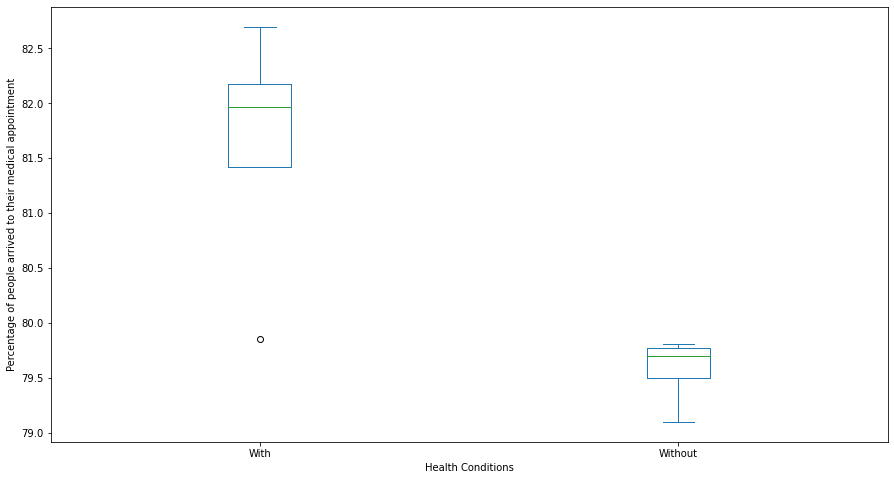

In [47]:
With = [81.99672667757774,82.69724770642202,81.9400983459991,79.85119047619048]
Without = [79.63890892784028,79.09852233405846,79.76432344575376,79.8070193447243]
index = ['Diabetes', 'Hypertension', 'Handicap', 'Alcoholism']
df_health_conditions = pd.DataFrame({'With': With,'Without': Without}, index=index) 
ax = df_health_conditions.plot.box(rot=0,figsize = (15,8))
plt.xlabel('Health Conditions')
plt.ylabel('Percentage of people arrived to their medical appointment')
plt.show()

From the above plot we can generally see that higher percentage of people that attended their appoitments were the one with the health conditions

### Research Question 3: Does sending an SMS regarding the medical appointment to the patients help them show up for their appointments?

In [48]:
#The number of people who arrived and had received an SMS
Arrived_with_sms = df_appointment[(df_appointment.SMS_received == 1) & (df_appointment.No_show == 1)].count().No_show
Arrived_with_sms

25697

In [49]:
#The number of people who received sms
People_who_received_sms = df_appointment[(df_appointment.SMS_received == 1)].count().SMS_received
People_who_received_sms

35481

In [50]:
#The number of people who arrived and had not received an SMS
Arrived_without_sms = df_appointment[(df_appointment.SMS_received == 0) & (df_appointment.No_show == 1)].count().No_show
Arrived_without_sms

62508

In [51]:
#The number of people who did not receive an sms
People_who_didnot_get_sms = df_appointment[(df_appointment.SMS_received == 0)].count().SMS_received
People_who_didnot_get_sms

75040

In [52]:
p9 = (Arrived_with_sms/People_who_received_sms) * 100
p10 = (Arrived_without_sms/People_who_didnot_get_sms) * 100
print('Percentage of those who arrived and had received an sms: {}'.format(p9))
print('Percentage of those who arrived and had not received an sms : {}'.format(p10))
print(p10-p9)

Percentage of those who arrived and had received an sms: 72.42467799667428
Percentage of those who arrived and had not received an sms : 83.2995735607676
10.874895564093322


This exploration tells us that sending an SMS to the patient about the appointment does not matter as we can actually see here that those who arrived and had not received an sms are much more and had a better response than those who received an sms

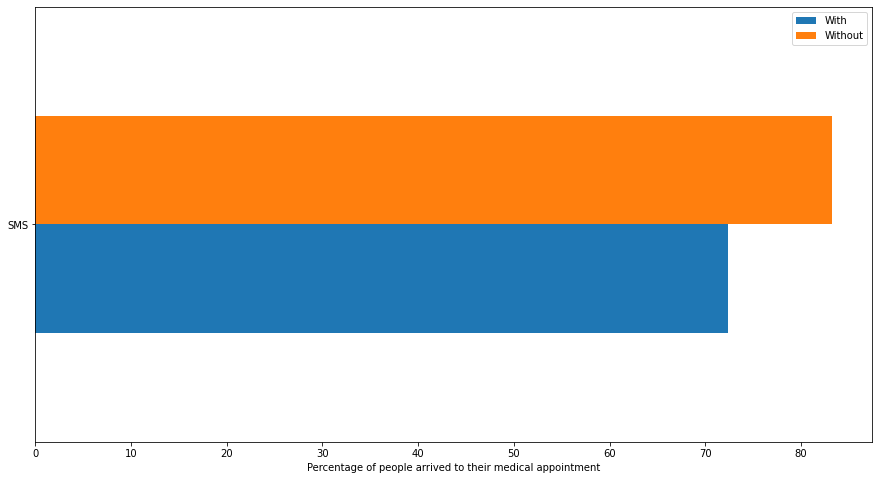

In [53]:
With = [72.42467799667428]
Without = [83.2995735607676]
index = ['SMS']
df_sms = pd.DataFrame({'With': With,'Without': Without}, index=index)
ax = df_sms.plot.barh(rot=0,figsize = (15,8))
plt.xlabel('Percentage of people arrived to their medical appointment')
plt.show()           

This plot has helped us to get a clear picture that those who did not get an sms generally made it to their appointment compared to thosethat received an sms

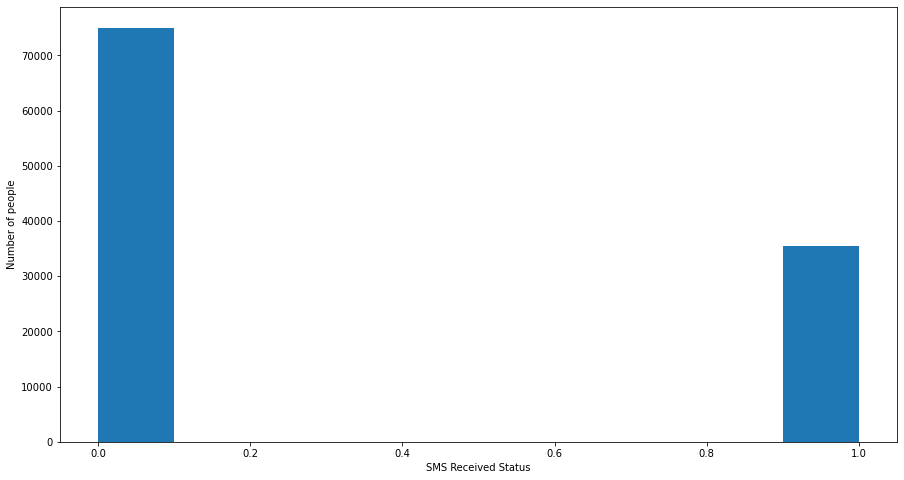

In [69]:
df_appointment['SMS_received'].plot(kind='hist', figsize=(15,8))
plt.xlabel('SMS Received Status')
plt.ylabel('Number of people')
plt.show()


From the previous argument, here we can also see that People who received an sms(1) are fewer than those who did not receive an sms(0) and actually in that state, many of this fewer number did not attend their appointments thus sending an sms did not bring about any effect to the attendance of the patients to their medical appointments

<a id='conclusions'></a>
***
## Conclusions and answers

The following are my questions and answers based on my exploration in this dataset:

* **Can the age of the patients be a factor for them to show up or not show up for the medical appointments?**
  * Generally, there is no clear pattern of age that determines whether the patients will attend their appointment or not


* **Does the patient's health condition affect if they will show up for their medical appointments?**
  * I dived into four health conditions which were Alcoholism, Hypertension, Handicap and Diabetes and clearly found out that these health conditions do matter in the question of whether the patient will attend the appointment or not. With an exception to alcoholism, people who suffered Hypertension, Handicap and Diabetes were more likely to make the appointment.
  
* **Does sending an SMS regarding the medical appointment to the patients help them show up for their appointments?**
  * Generally, sending an sms does not help them show up for the appointments as the people who did not receive an sms attended their appointments better 

The following are the limitations I came upon to discover:

* **In the data source we are told that SMS_received means 1 or more messages sent to the patient, there is no any specification whether the sms was sent prior to the appointment day and by what time, basically I think sending an sms before the appointment day would actually help boost the attendance of patients to their appointments**

* **The Handicap data was only numerical and you could not get a picture of the seriousness of the patients' handicaps**

References used:

  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
     
  https://stackoverflow.com/questions/34251641/how-to-make-a-bar-plot-of-non-numerical-data-in-pandas  
     
  https://stackoverflow.com/questions/52874240/usageerror-line-magic-function-not-found-jupyter-notebook